# Sure Tomorrow Insurance Company

The Sure Tomorrow insurance company wants to solve several tasks with the help of Machine Learning and you are asked to evaluate that possibility.

- Task 1: Find customers who are similar to a given customer. This will help the company's agents with marketing.
- Task 2: Predict whether a new customer is likely to receive an insurance benefit. Can a prediction model do better than a dummy model?
- Task 3: Predict the number of insurance benefits a new customer is likely to receive using a linear regression model.
- Task 4: Protect clients' personal data without breaking the model from the previous task. It's necessary to develop a data transformation algorithm that would make it hard to recover personal information if the data fell into the wrong hands. This is called data masking, or data obfuscation. But the data should be protected in such a way that the quality of machine learning models doesn't suffer. You don't need to pick the best model, just prove that the algorithm works correctly.

# Data Preprocessing & Exploration

## Initialization

In [1]:
pip install scikit-learn --upgrade

  Using cached scikit_learn-1.2.2-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (9.6 MB)
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
ERROR: Could not install packages due to an OSError: [Errno 13] Permission denied: 'INSTALLER'
Consider using the `--user` option or check the permissions.

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd

import seaborn as sns

import sklearn.linear_model
import sklearn.metrics
import sklearn.neighbors
import sklearn.preprocessing

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors
import math

from IPython.display import display
import warnings
warnings.filterwarnings('ignore')

## Load Data

In [3]:
df = pd.read_csv('/datasets/insurance_us.csv')

In [4]:
df = df.rename(columns={'Gender': 'gender', 'Age': 'age', 'Salary': 'income', 'Family members': 'family_members', 'Insurance benefits': 'insurance_benefits'})

In [5]:
df.sample(10)

,gender,age,income,family_members,insurance_benefits
4037,1,45.0,46600.0,2,1
4867,1,24.0,46700.0,2,0
1036,1,20.0,18900.0,1,0
1044,0,35.0,36100.0,2,0
4024,1,39.0,35500.0,0,0
4499,1,20.0,37100.0,3,0
716,1,44.0,29900.0,2,1
4524,0,18.0,36900.0,1,0
163,0,31.0,43200.0,3,0
4537,1,22.0,29800.0,2,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              5000 non-null   int64  
 1   age                 5000 non-null   float64
 2   income              5000 non-null   float64
 3   family_members      5000 non-null   int64  
 4   insurance_benefits  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [8]:
df['age'] = df['age'].astype(int)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              5000 non-null   int64  
 1   age                 5000 non-null   int64  
 2   income              5000 non-null   float64
 3   family_members      5000 non-null   int64  
 4   insurance_benefits  5000 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 195.4 KB


In [10]:
df['income'] = df['income'].astype(int)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   gender              5000 non-null   int64
 1   age                 5000 non-null   int64
 2   income              5000 non-null   int64
 3   family_members      5000 non-null   int64
 4   insurance_benefits  5000 non-null   int64
dtypes: int64(5)
memory usage: 195.4 KB


In [13]:
df.describe()

,gender,age,income,family_members,insurance_benefits
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.359400,1.194200,0.148000
std,0.500049,8.440807,9900.082063,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


In [14]:
df.duplicated().sum()

153

In [15]:
# percentage of duplicates
df.duplicated().sum() / df.shape[0]

0.0306

In [16]:
df[df.duplicated()].head()

,gender,age,income,family_members,insurance_benefits
281,1,39,48100,1,0
488,1,24,32900,1,0
513,0,31,37400,2,0
718,1,22,32600,1,0
785,0,20,35800,0,0


In [17]:
df = df.drop_duplicates()

In [18]:
df.shape

(4847, 5)

## EDA

Let's quickly check whether there are certain groups of customers by looking at the pair plot.

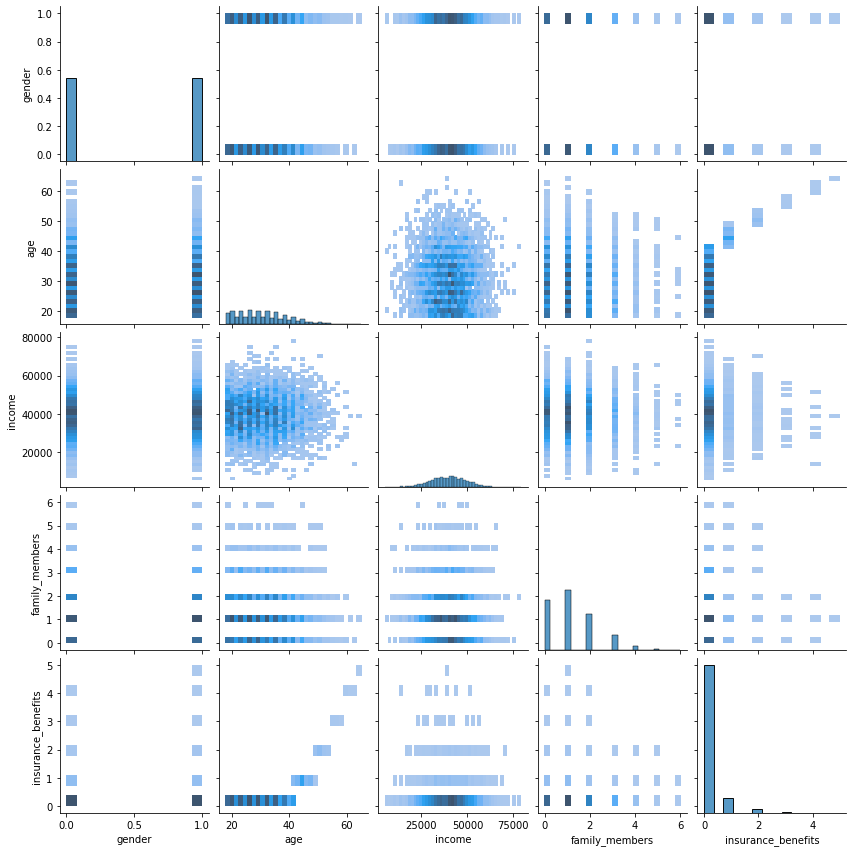

In [19]:
g = sns.pairplot(df, kind='hist')
g.fig.set_size_inches(12, 12)

In [20]:
df.corr()

,gender,age,income,family_members,insurance_benefits
gender,1.000000,0.001953,0.015456,-0.007315,0.011565
age,0.001953,1.000000,-0.017386,-0.009064,0.654964
income,0.015456,-0.017386,1.000000,-0.031687,-0.013123
family_members,-0.007315,-0.009064,-0.031687,1.000000,-0.039303
insurance_benefits,0.011565,0.654964,-0.013123,-0.039303,1.000000


# Task 1. Similar Customers

In the language of ML, it is necessary to develop a procedure that returns k nearest neighbors (objects) for a given object based on the distance between the objects.

You may want to review the following lessons (chapter -> lesson)
- Distance Between Vectors -> Euclidean Distance
- Distance Between Vectors -> Manhattan Distance

To solve the task, we can try different distance metrics.

Write a function that returns k nearest neighbors for an $n^{th}$ object based on a specified distance metric. The number of received insurance benefits should not be taken into account for this task. 

You can use a ready implementation of the kNN algorithm from scikit-learn (check [the link](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html#sklearn.neighbors.NearestNeighbors)) or use your own.

Test it for four combination of two cases
- Scaling
  - the data is not scaled
  - the data is scaled with the [MaxAbsScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MaxAbsScaler.html) scaler
- Distance Metrics
  - Euclidean
  - Manhattan

Answer these questions:
- Does the data being not scaled affect the kNN algorithm? If so, how does that appear?
- How similar are the results using the Manhattan distance metric (regardless of the scaling)?

In [21]:
feature_names = ['gender', 'age', 'income', 'family_members']

In [28]:
def get_knn(df, n, k, metric):
    
    """
    Returns k nearest neighbors

    :param df: pandas DataFrame used to find similar objects within
    :param n: object no for which the nearest neighbours are looked for
    :param k: the number of the nearest neighbours to return
    :param metric: name of distance metric
    """
    np.random.seed(42)
    nbrs = NearestNeighbors(n_neighbors=k, metric=metric).fit(df)
    nbrs_distances, nbrs_indices = nbrs.kneighbors([df.iloc[n][feature_names]], k, return_distance=True)
    
    df_res = pd.concat([
        df.iloc[nbrs_indices[0]], 
        pd.DataFrame(nbrs_distances.T, index=nbrs_indices[0], columns=['distance'])
        ], axis=1)
    
    return df_res

In [23]:
feature_names = ['gender', 'age', 'income', 'family_members']

transformer_mas = sklearn.preprocessing.MaxAbsScaler().fit(df[feature_names].to_numpy())

df_scaled = df.copy()
df_scaled.loc[:, feature_names] = transformer_mas.transform(df[feature_names].to_numpy())

In [24]:
df_scaled.sample(5)

,gender,age,income,family_members,insurance_benefits
3997,0.0,0.384615,0.236709,0.333333,0
3721,0.0,0.569231,0.550633,0.500000,0
4639,1.0,0.400000,0.437975,0.333333,0
906,0.0,0.415385,0.608861,0.000000,0
3577,0.0,0.615385,0.568354,0.166667,0


In [25]:
def check_knn_results(df, k, n, scaling='Scaled', metrics=[]):
    for metric in metrics:
        print('{} results for {}'.format(scaling, metric))
        print('-'*50)
        print(get_knn(df, n, k, metric))
        print()

In [26]:
df = df.reset_index(drop=True)

In [29]:
metrics = ['euclidean', 'manhattan']
check_knn_results(df[feature_names], k=5, n=100, scaling='Unscaled', metrics=metrics)

Unscaled results for euclidean
--------------------------------------------------
      gender  age  income  family_members  distance
100        0   19   37300               1  0.000000
1803       0   20   37300               2  1.414214
4147       1   19   37300               2  1.414214
2569       1   19   37300               0  1.414214
1078       0   22   37300               3  3.605551

Unscaled results for manhattan
--------------------------------------------------
      gender  age  income  family_members  distance
100        0   19   37300               1       0.0
2569       1   19   37300               0       2.0
1803       0   20   37300               2       2.0
4147       1   19   37300               2       2.0
1078       0   22   37300               3       5.0



In [30]:
df_scaled = df_scaled.reset_index(drop=True)

In [31]:
metrics = ['euclidean', 'manhattan']
check_knn_results(df_scaled[feature_names], k=5, n=100, metrics=metrics)

Scaled results for euclidean
--------------------------------------------------
      gender       age    income  family_members  distance
100      0.0  0.292308  0.472152        0.166667  0.000000
4765     0.0  0.292308  0.477215        0.166667  0.005063
243      0.0  0.292308  0.467089        0.166667  0.005063
1309     0.0  0.292308  0.456962        0.166667  0.015190
806      0.0  0.307692  0.470886        0.166667  0.015437

Scaled results for manhattan
--------------------------------------------------
      gender       age    income  family_members  distance
100      0.0  0.292308  0.472152        0.166667  0.000000
4765     0.0  0.292308  0.477215        0.166667  0.005063
243      0.0  0.292308  0.467089        0.166667  0.005063
1309     0.0  0.292308  0.456962        0.166667  0.015190
806      0.0  0.307692  0.470886        0.166667  0.016650



**Does the data being not scaled affect the kNN algorithm? If so, how does that appear?** 

Yes. The distance metrics of both euclidean and manhattan are affected by income.

**How similar are the results using the Manhattan distance metric (regardless of the scaling)?** 

With scaling, Manhattan distances are more precise. 

# Task 2. Is Customer Likely to Receive Insurance Benefit?

In terms of machine learning we can look at this like a binary classification task.

With `insurance_benefits` being more than zero as the target, evaluate whether the kNN classification approach can do better than a dummy model.

Instructions:
- Build a KNN-based classifier and measure its quality with the F1 metric for k=1..10 for both the original data and the scaled one. That'd be interesting to see how k may influece the evaluation metric, and whether scaling the data makes any difference. You can use a ready implemention of the kNN classification algorithm from scikit-learn (check [the link](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)) or use your own.
- Build the dummy model which is just random for this case. It should return "1" with some probability. Let's test the model with four probability values: 0, the probability of paying any insurance benefit, 0.5, 1.

The probability of paying any insurance benefit can be defined as

$$
P\{\text{insurance benefit received}\}=\frac{\text{number of clients received any insurance benefit}}{\text{total number of clients}}.
$$

Split the whole data in the 70:30 proportion for the training/testing parts.

In [32]:
# calculate the target

df['insurance_benefits_received'] = (df['insurance_benefits'] > 0.5).astype(int)

In [33]:
# check for the class imbalance with value_counts()

df['insurance_benefits_received'].value_counts()

0    4284
1     563
Name: insurance_benefits_received, dtype: int64

In [34]:
def eval_classifier(y_true, y_pred):
    
    f1_score = sklearn.metrics.f1_score(y_true, y_pred)
    print(f'F1: {f1_score:.2f}')
    
# if you have an issue with the following line, restart the kernel and run the notebook again
    cm = sklearn.metrics.confusion_matrix(y_true, y_pred, normalize='all')
    print('Confusion Matrix')
    print(cm)

In [35]:
# generating output of a random model

def rnd_model_predict(P, size, seed=42):

    rng = np.random.default_rng(seed=seed)
    return rng.binomial(n=1, p=P, size=size)

In [37]:
for P in [0, df['insurance_benefits_received'].sum() / len(df), 0.5, 1]:

    print(f'The probability: {P:.2f}')
    y_pred_rnd = rnd_model_predict(P, size=len(df), seed=42)
        
    eval_classifier(df['insurance_benefits_received'], y_pred_rnd)
    
    print()

The probability: 0.00
F1: 0.00
Confusion Matrix
[[0.88384568 0.        ]
 [0.11615432 0.        ]]

The probability: 0.12
F1: 0.13
Confusion Matrix
[[0.78502166 0.09882401]
 [0.1017124  0.01444192]]

The probability: 0.50
F1: 0.19
Confusion Matrix
[[0.44873117 0.4351145 ]
 [0.05921188 0.05694244]]

The probability: 1.00
F1: 0.21
Confusion Matrix
[[0.         0.88384568]
 [0.         0.11615432]]



In [39]:
train, valid = \
(
    train_test_split(df, stratify=df['insurance_benefits_received'], test_size=0.3, random_state=42)
)

feature_train, target_train = train[feature_names], train['insurance_benefits_received']
feature_valid, target_valid = valid[feature_names], valid['insurance_benefits_received']

In [40]:
feature_train.shape, target_train.shape, feature_valid.shape, target_valid.shape

((3392, 4), (3392,), (1455, 4), (1455,))

In [41]:
def build_model(train, target, test, n_neighbors):
    np.random.seed(42)
    model = KNeighborsClassifier(n_neighbors = n_neighbors)
    model.fit(feature_train, target)
    y_pred = model.predict(test)
    return y_pred

In [43]:
n_neighbors = 10
for k in range(1, n_neighbors+1):
    y_pred = build_model(feature_train, target_train, feature_valid, k)
    print('For neighbor k={}'.format(k))
    eval_classifier(target_valid, y_pred)
    print()

For neighbor k=1
F1: 0.68
Confusion Matrix
[[0.86804124 0.01580756]
 [0.04879725 0.06735395]]

For neighbor k=2
F1: 0.40
Confusion Matrix
[[0.87835052 0.00549828]
 [0.08591065 0.03024055]]

For neighbor k=3
F1: 0.41
Confusion Matrix
[[0.87353952 0.01030928]
 [0.0838488  0.03230241]]

For neighbor k=4
F1: 0.21
Confusion Matrix
[[0.88041237 0.00343643]
 [0.1024055  0.0137457 ]]

For neighbor k=5
F1: 0.22
Confusion Matrix
[[0.8790378  0.004811  ]
 [0.10103093 0.01512027]]

For neighbor k=6
F1: 0.02
Confusion Matrix
[[0.8838488  0.        ]
 [0.11477663 0.00137457]]

For neighbor k=7
F1: 0.05
Confusion Matrix
[[0.88109966 0.00274914]
 [0.11340206 0.00274914]]

For neighbor k=8
F1: 0.03
Confusion Matrix
[[8.83161512e-01 6.87285223e-04]
 [1.14089347e-01 2.06185567e-03]]

For neighbor k=9
F1: 0.03
Confusion Matrix
[[0.88247423 0.00137457]
 [0.11408935 0.00206186]]

For neighbor k=10
F1: 0.02
Confusion Matrix
[[0.8838488  0.        ]
 [0.11477663 0.00137457]]



In [44]:
df_scaled['insurance_benefits_received'] = (df_scaled['insurance_benefits'] > 0).astype(int)

In [46]:
train, valid = \
(
    train_test_split(df_scaled, stratify=df_scaled['insurance_benefits_received'], test_size=0.3, random_state=42)
)

feature_train, target_train = train[feature_names], train['insurance_benefits_received']
feature_valid, target_valid = valid[feature_names], valid['insurance_benefits_received']

In [47]:
feature_train.shape, target_train.shape, feature_valid.shape, target_valid.shape

((3392, 4), (3392,), (1455, 4), (1455,))

In [49]:
for k in range(1, n_neighbors+1):
    y_pred = build_model(feature_train, target_train, feature_valid, k)
    print('For neighbor k={}'.format(k))
    eval_classifier(target_valid, y_pred)
    print()

For neighbor k=1
F1: 0.94
Confusion Matrix
[[0.8790378  0.004811  ]
 [0.00824742 0.10790378]]

For neighbor k=2
F1: 0.91
Confusion Matrix
[[0.88109966 0.00274914]
 [0.01786942 0.09828179]]

For neighbor k=3
F1: 0.92
Confusion Matrix
[[0.87697595 0.00687285]
 [0.01168385 0.10446735]]

For neighbor k=4
F1: 0.89
Confusion Matrix
[[8.83161512e-01 6.87285223e-04]
 [2.33676976e-02 9.27835052e-02]]

For neighbor k=5
F1: 0.91
Confusion Matrix
[[0.87972509 0.00412371]
 [0.01580756 0.10034364]]

For neighbor k=6
F1: 0.88
Confusion Matrix
[[8.83161512e-01 6.87285223e-04]
 [2.40549828e-02 9.20962199e-02]]

For neighbor k=7
F1: 0.91
Confusion Matrix
[[0.88247423 0.00137457]
 [0.01718213 0.09896907]]

For neighbor k=8
F1: 0.89
Confusion Matrix
[[0.8838488  0.        ]
 [0.02268041 0.09347079]]

For neighbor k=9
F1: 0.91
Confusion Matrix
[[8.83161512e-01 6.87285223e-04]
 [1.92439863e-02 9.69072165e-02]]

For neighbor k=10
F1: 0.88
Confusion Matrix
[[0.8838488  0.        ]
 [0.02542955 0.09072165]]



* Observation:
* At k=10, scaled features are 88% while unscaled features are only 2%. This shows that the use of distance metric during fitting are affected by larger features which are income. 

# Task 3. Regression (with Linear Regression)

With `insurance_benefits` as the target, evaluate what RMSE would be for a Linear Regression model.

Build your own implementation of LR. For that, recall how the linear regression task's solution is formulated in terms of LA. Check RMSE for both the original data and the scaled one. Can you see any difference in RMSE between these two cases?

Let's denote
- $X$ — feature matrix, each row is a case, each column is a feature, the first column consists of unities
- $y$ — target (a vector)
- $\hat{y}$ — estimated tagret (a vector)
- $w$ — weight vector

The task of linear regression in the language of matrices can be formulated as

$$
y = Xw
$$

The training objective then is to find such $w$ that it would minimize the L2-distance (MSE) between $Xw$ and $y$:

$$
\min_w d_2(Xw, y) \quad \text{or} \quad \min_w \text{MSE}(Xw, y)
$$

It appears that there is analytical solution for the above:

$$
w = (X^T X)^{-1} X^T y
$$

The formula above can be used to find the weights $w$ and the latter can be used to calculate predicted values

$$
\hat{y} = X_{val}w
$$

Split the whole data in the 70:30 proportion for the training/validation parts. Use the RMSE metric for the model evaluation.

In [50]:
class MyLinearRegression:
    
    def __init__(self):
        
        self.weights = None
    
    def fit(self, X, y):
        
        # adding the unities
        X2 = np.append(np.ones([len(X), 1]), X, axis=1)
        self.weights = np.linalg.inv(X2.T.dot(X2)).dot(X2.T).dot(y)

    def predict(self, X):
        
        # adding the unities
        X2 = np.append(np.ones([X.shape[0], 1]), X, axis=1)
        y_pred = np.dot(X2, self.weights)
        
        return y_pred

In [51]:
def eval_regressor(y_true, y_pred):
    
    rmse = math.sqrt(sklearn.metrics.mean_squared_error(y_true, y_pred))
    print(f'RMSE: {rmse:.2f}')
    
    r2_score = math.sqrt(sklearn.metrics.r2_score(y_true, y_pred))
    print(f'R2: {r2_score:.2f}')    

In [52]:
X = df[['age', 'gender', 'income', 'family_members']].to_numpy()
y = df['insurance_benefits'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

lr = MyLinearRegression()

lr.fit(X_train, y_train)
print(lr.weights)

y_test_pred = lr.predict(X_test)
eval_regressor(y_test, y_test_pred)

[-9.77366679e-01  3.58042290e-02  1.95594897e-02  5.85335011e-07
 -1.21618426e-02]
RMSE: 0.36
R2: 0.66


In [53]:
X = df_scaled[['age', 'gender', 'income', 'family_members']].to_numpy()
y = df_scaled['insurance_benefits'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

lr = MyLinearRegression()

lr.fit(X_train, y_train)
print(lr.weights)

y_test_pred = lr.predict(X_test)
eval_regressor(y_test, y_test_pred)

[-0.97736668  2.32727489  0.01955949  0.04624147 -0.07297106]
RMSE: 0.36
R2: 0.66


* Observations:
* No difference in R2 scores in scaling. It remains the same. 

# Task 4. Obfuscating Data

It best to obfuscate data by multiplying the numerical features (remember, they can be seen as the matrix $X$) by an invertible matrix $P$. 

$$
X' = X \times P
$$

Try to do that and check how the features' values will look like after the transformation. By the way, the intertible property is important here so make sure that $P$ is indeed invertible.

You may want to review the 'Matrices and Matrix Operations -> Matrix Multiplication' lesson to recall the rule of matrix multiplication and its implementation with NumPy.

In [54]:
personal_info_column_list = ['gender', 'age', 'income', 'family_members']
df_pn = df[personal_info_column_list]

In [55]:
X = df_pn.to_numpy()

Generating a random matrix $P$.

In [56]:
rng = np.random.default_rng(seed=42)
P = rng.random(size=(X.shape[1], X.shape[1]))

Checking the matrix $P$ is invertible

In [57]:
np.dot(P, np.linalg.inv(P))

array([[ 1.00000000e+00, -1.69848573e-16, -7.58122972e-17,
        -1.13112497e-16],
       [-6.94895396e-17,  1.00000000e+00, -7.10568689e-17,
         3.59096970e-17],
       [-1.21269339e-16, -8.01461326e-17,  1.00000000e+00,
         4.30764008e-19],
       [-3.60694539e-16, -5.55430227e-16,  3.08072404e-16,
         1.00000000e+00]])

In [58]:
np.allclose(np.dot(P, np.linalg.inv(P)), np.dot(np.linalg.inv(P), P))

True

In [59]:
np.dot(X,P)

array([[ 6359.71527314, 22380.40467609, 18424.09074184, 46000.69669016],
       [ 4873.29406479, 17160.36702982, 14125.78076133, 35253.45577301],
       [ 2693.11742928,  9486.397744  ,  7808.83156024, 19484.86063067],
       ...,
       [ 4346.2234249 , 15289.24126492, 12586.16264392, 31433.50888552],
       [ 4194.09324155, 14751.9910242 , 12144.02930637, 30323.88763426],
       [ 5205.46827354, 18314.24814446, 15077.01370762, 37649.59295455]])

Can you guess the customers' ages or income after the transformation?

* It is unclear. 

Can you recover the original data from $X'$ if you know $P$? Try to check that with calculations by moving $P$ from the right side of the formula above to the left one. The rules of matrix multiplcation are really helpful here.

In [60]:
pd.DataFrame(np.dot(X, np.dot(P, np.linalg.inv(P))), columns=feature_names).head()

,gender,age,income,family_members
0,1.000000e+00,41.0,49600.0,1.000000e+00
1,-4.611792e-12,46.0,38000.0,1.000000e+00
2,-2.548671e-12,29.0,21000.0,1.008743e-14
3,-5.059112e-12,21.0,41700.0,2.000000e+00
4,1.000000e+00,28.0,26100.0,1.213530e-14


Print all three cases for a few customers
- The original data
- The transformed one
- The reversed (recovered) one

In [62]:
#original dataframe
pd.DataFrame(X, columns=feature_names).head()

,gender,age,income,family_members
0,1,41,49600,1
1,0,46,38000,1
2,0,29,21000,0
3,0,21,41700,2
4,1,28,26100,0


In [64]:
#Transformed One
pd.DataFrame(np.dot(X, P), columns=feature_names).head()

,gender,age,income,family_members
0,6359.715273,22380.404676,18424.090742,46000.696690
1,4873.294065,17160.367030,14125.780761,35253.455773
2,2693.117429,9486.397744,7808.831560,19484.860631
3,5345.603937,18803.227203,15479.148373,38663.061863
4,3347.176735,11782.829283,9699.998942,24211.273378


In [65]:
# Reversed One
pd.DataFrame(np.dot(X, np.dot(P, np.linalg.inv(P))), columns=feature_names).head()

,gender,age,income,family_members
0,1.000000e+00,41.0,49600.0,1.000000e+00
1,-4.611792e-12,46.0,38000.0,1.000000e+00
2,-2.548671e-12,29.0,21000.0,1.008743e-14
3,-5.059112e-12,21.0,41700.0,2.000000e+00
4,1.000000e+00,28.0,26100.0,1.213530e-14


## Proof That Data Obfuscation Can Work with LR

The regression task has been solved with linear regression in this project. Your next task is to prove _analytically_ that the given obfuscation method won't affect linear regression in terms of predicted values i.e. their values will remain the same. Can you believe that? Well, you don't have to, you should prove it!

So, the data is obfuscated and there is $X \times P$ instead of just $X$ now. Consequently, there are other weights $w_P$ as
$$
w = (X^T X)^{-1} X^T y \quad \Rightarrow \quad w_P = [(XP)^T XP]^{-1} (XP)^T y
$$

How would $w$ and $w_P$ be linked if you simplify the formula for $w_P$ above? 

What would be predicted values with $w_P$? 

What does that mean for the quality of linear regression if you measure it with RMSE?

Check Appendix B Properties of Matrices in the end of the notebook. There are useful formulas in there!

No code is necessary in this section, only analytical explanation!

**Analytical proof**

Given: 
$$ 
w_P = [(XP)^T XP]^{-1} (XP)^T y $$

Solution:
$$ w_P = [P^TX^T XP]^{-1} (XP)^T y $$

$$ w_P = [P^TX^T XP]^{-1} P^T X^T y $$

$$ w_P = P^{-1}(X^TX)^{-1}IX^Ty,\\ given\ that A^{-1} A = I, (P^T)^{-1}P^T=I $$

$$ w_P = P^{-1}w, \\
if w=(X^TX)^{-1}X^Ty
$$

$$ P w_P = P P^{-1} w$$

$$ P w_P = w $$

$$ W = P w_P $$

**Answer**

* Observation:
* The analytical proof above shows that there are no impact to the quality of regression as the results after obfuscation is the same as it would have been without it. 

## Test Linear Regression With Data Obfuscation

Now, let's prove Linear Regression can work computationally with the chosen obfuscation transformation.

Build a procedure or a class that runs Linear Regression optionally with the obfuscation. You can use either a ready implementation of Linear Regression from sciki-learn or your own.

Run Linear Regression for the original data and the obfuscated one, compare the predicted values and the RMSE, $R^2$ metric values. Is there any difference?

**Procedure**

- Create a square matrix $P$ of random numbers.
- Check that it is invertible. If not, repeat the first point until we get an invertible matrix.
- <! your comment here !>
- Use $XP$ as the new feature matrix

In [66]:
def generate_square_matrix(num_features, seed=42):
    rng = np.random.default_rng(seed=seed)
    return rng.random(size = (num_features, num_features))

In [67]:
P = generate_square_matrix(4, seed=1234)

In [68]:
def is_invertible(P):
    return np.allclose(np.dot(P, np.linalg.inv(P)), np.dot(np.linalg.inv(P), P))

In [69]:
is_invertible(P)

True

In [70]:
X = df[['age', 'gender', 'income', 'family_members']].to_numpy()
y = df['insurance_benefits'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(np.dot(X, P), y, test_size=0.3, random_state=12345)

lr = MyLinearRegression()

lr.fit(X_train, y_train)
print(lr.weights)

y_test_pred = lr.predict(X_test)
eval_regressor(y_test, y_test_pred)

[-0.97736127 -0.08612947 -0.09935663  0.15099345  0.06992061]
RMSE: 0.36
R2: 0.66


In [71]:
X = df_scaled[['age', 'gender', 'income', 'family_members']].to_numpy()
y = df_scaled['insurance_benefits'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(np.dot(X, P), y, test_size=0.3, random_state=12345)

lr = MyLinearRegression()

lr.fit(X_train, y_train)
print(lr.weights)

y_test_pred = lr.predict(X_test)
eval_regressor(y_test, y_test_pred)

[-0.97736668  0.36150346 -1.23349036  3.31509473 -2.35958842]
RMSE: 0.36
R2: 0.66


* Observation:
* The results show that even after obfuscating the data, the RMSE and R2 score from the Linear Regression model are the same.

# Conclusions

Our study utilized K-Nearest Neighbors algorithm to identify customers in close proximity to a given customer. To enhance the predictive power of this model, we implemented data scaling and utilized the Euclidean metric resulting in improved prediction accuracy.

Moreover, we have developed predictive models to assist our marketing team in determining whether a customer is likely to receive insurance benefits. The optimized model, trained on scaled data, significantly outperformed a dummy model, achieving an impressive F1 score of 92% on the validation set.

In addition, we utilized Linear Regression to forecast the number of insurance benefits a new customer would receive. We constructed models on both scaled and unscaled data and found that scaling did not have any significant impact on the results. The model trained on the scaled data produced a moderately high R-squared score of 66%.

To ensure the confidentiality of customer data, we obfuscated the data, and performed a comparative analysis of the results on both the original and obfuscated data sets. We determined that there was no notable difference between the obfuscated and original data through analytical methods. Furthermore, we validated our results computationally by building a Linear Regression model on the obfuscated data, and observed identical RMSE and R-squared scores compared to modeling the original data.

# Appendices 

## Appendix A: Writing Formulas in Jupyter Notebooks

You can write formulas in your Jupyter Notebook in a markup language provided by a high-quality publishing system called $\LaTeX$ (pronounced "Lah-tech"), and they will look like formulas in textbooks.

To put a formula in a text, put the dollar sign (\\$) before and after the formula's text e.g. $\frac{1}{2} \times \frac{3}{2} = \frac{3}{4}$ or $y = x^2, x \ge 1$.

If a formula should be in its own paragraph, put the double dollar sign (\\$\\$) before and after the formula text e.g.

$$
\bar{x} = \frac{1}{n}\sum_{i=1}^{n} x_i.
$$

The markup language of [LaTeX](https://en.wikipedia.org/wiki/LaTeX) is very popular among people who use formulas in their articles, books and texts. It can be complex but its basics are easy. Check this two page [cheatsheet](http://tug.ctan.org/info/undergradmath/undergradmath.pdf) for learning how to compose the most common formulas.

## Appendix B: Properties of Matrices

Matrices have many properties in Linear Algebra. A few of them are listed here which can help with the analytical proof in this project.

<table>
<tr>
<td>Distributivity</td><td>$A(B+C)=AB+AC$</td>
</tr>
<tr>
<td>Non-commutativity</td><td>$AB \neq BA$</td>
</tr>
<tr>
<td>Associative property of multiplication</td><td>$(AB)C = A(BC)$</td>
</tr>
<tr>
<td>Multiplicative identity property</td><td>$IA = AI = A$</td>
</tr>
<tr>
<td></td><td>$A^{-1}A = AA^{-1} = I$
</td>
</tr>    
<tr>
<td></td><td>$(AB)^{-1} = B^{-1}A^{-1}$</td>
</tr>    
<tr>
<td>Reversivity of the transpose of a product of matrices,</td><td>$(AB)^T = B^TA^T$</td>
</tr>    
</table>